### Uber Data Analysis

#### Importing require libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Importing our dataset

In [2]:
df=pd.read_csv(r'C:\Users\User\Downloads\Uber-Jan-Feb-FOIL.csv')

#### Top 5 records

In [3]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


#### Last 5 records

In [4]:
df.tail()

,dispatching_base_number,date,active_vehicles,trips
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


#### Shape Of the dataset 

In [5]:
df.shape

(354, 4)

### Data Pre-processing

In [6]:
df['dispatching_base_number'].value_counts()

B02512    59
B02764    59
B02682    59
B02765    59
B02617    59
B02598    59
Name: dispatching_base_number, dtype: int64

#### Dataset is a balanced dataset.

#### Checking NUll values

In [7]:
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [8]:
df.isnull().mean()

dispatching_base_number    0.0
date                       0.0
active_vehicles            0.0
trips                      0.0
dtype: float64

#### There is no null values 

#### Some basic information about our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [10]:
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [11]:
df.corr()

,active_vehicles,trips
active_vehicles,1.000000,0.980493
trips,0.980493,1.000000


In [12]:
df['dispatching_base_number'].value_counts() ## Dependent Variable

B02512    59
B02764    59
B02682    59
B02765    59
B02617    59
B02598    59
Name: dispatching_base_number, dtype: int64

#### Datavisualization using graph and charts

#### Histogram


<AxesSubplot:xlabel='active_vehicles', ylabel='Count'>

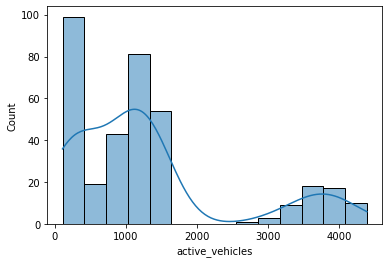

In [13]:
sns.histplot(data=df,x='active_vehicles',kde=True)

In [14]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


<AxesSubplot:xlabel='trips', ylabel='Count'>

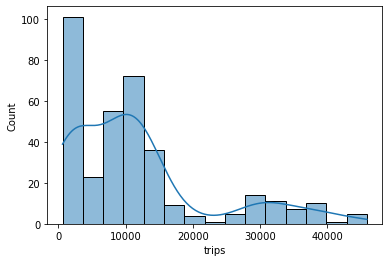

In [15]:
sns.histplot(data=df,x='trips',kde=True)

#### Barplot

<AxesSubplot:xlabel='dispatching_base_number', ylabel='trips'>

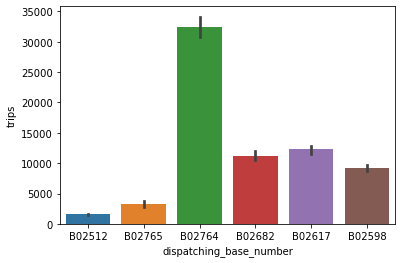

In [16]:
sns.barplot(data=df,x='dispatching_base_number',y='trips')

#### We can see dispatching_base_number 'B02764' have the trips than others.

<AxesSubplot:xlabel='dispatching_base_number', ylabel='active_vehicles'>

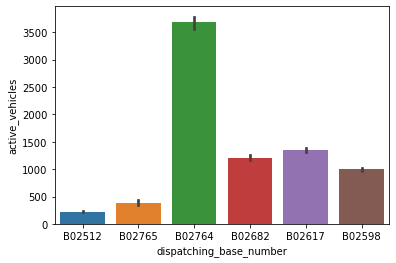

In [17]:
sns.barplot(data=df,x='dispatching_base_number',y='active_vehicles')

#### Stripplot

<AxesSubplot:xlabel='dispatching_base_number', ylabel='trips'>

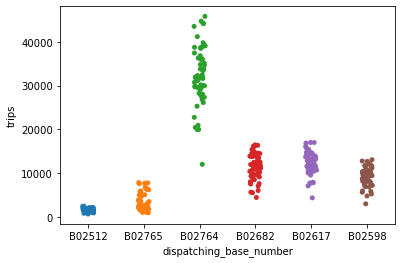

In [18]:
sns.stripplot(x='dispatching_base_number',y='trips',data=df)

<AxesSubplot:xlabel='dispatching_base_number', ylabel='active_vehicles'>

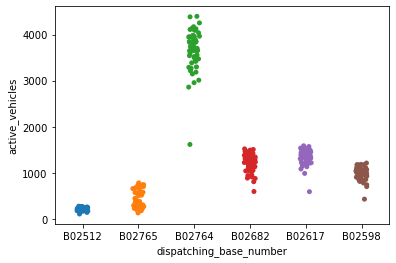

In [19]:
sns.stripplot(x='dispatching_base_number',y='active_vehicles',data=df)

#### Box PLot

<AxesSubplot:>

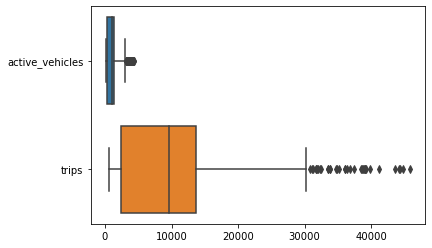

In [20]:
sns.boxplot(data=df,orient='h')

In [21]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


#### PAIR PLOT

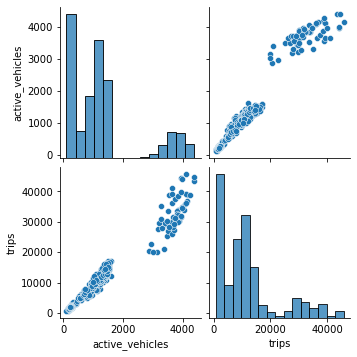

In [22]:
sns.pairplot(data=df)

#### Correlation Matrix

<AxesSubplot:>

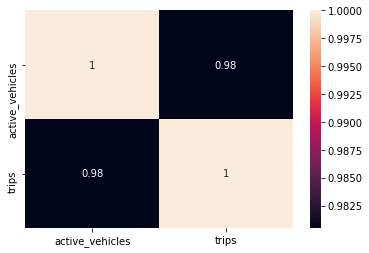

In [23]:
sns.heatmap(df.corr(),annot=True)

#### In the correlation matrix we can observed that active_vehicles and trips both are highly correlated.

#### Dependent Feature

In [25]:
y=df['dispatching_base_number']

In [26]:
y

0      B02512
1      B02765
2      B02764
3      B02682
4      B02617
        ...  
349    B02764
350    B02617
351    B02682
352    B02512
353    B02765
Name: dispatching_base_number, Length: 354, dtype: object

#### Independent Feature

In [27]:
x=df[['active_vehicles','trips']]

In [28]:
x

,active_vehicles,trips
0,190,1132
1,225,1765
2,3427,29421
3,945,7679
4,1228,9537
...,...,...
349,3952,39812
350,1372,14022
351,1386,14472
352,230,1803


#### Import train test split function

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42) #70% training and 30% test data.

#### Import Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gausssian Classifier
clf=RandomForestClassifier(n_estimators=80)

# Train the model using the training sets
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

#### Checking Model Accuracy

In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("RandomForestClassifier Model accuracy: ",accuracy)

RandomForestClassifier Model accuracy:  0.7008547008547008


#### Plotting Confusion Matrix

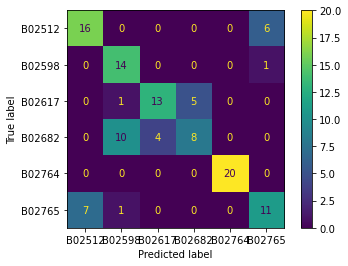

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)

#### Classification report  for Random forest model

In [33]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      B02512       0.70      0.73      0.71        22
      B02598       0.54      0.93      0.68        15
      B02617       0.76      0.68      0.72        19
      B02682       0.62      0.36      0.46        22
      B02764       1.00      1.00      1.00        20
      B02765       0.61      0.58      0.59        19

    accuracy                           0.70       117
   macro avg       0.70      0.71      0.69       117
weighted avg       0.71      0.70      0.69       117



### Apply Logistics Regression

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
classifier=LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto')
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred=classifier.predict(x_test)

#### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[22,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  1],
       [ 0,  3, 15,  0,  0,  1],
       [ 0, 10, 11,  1,  0,  0],
       [ 0,  0,  0,  0, 20,  0],
       [10,  4,  0,  0,  0,  5]], dtype=int64)

#### Checking Model Accuarcy

In [40]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6581196581196581

#### Classification report for Logistics Regresssion Model

In [41]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

      B02512       0.69      1.00      0.81        22
      B02598       0.45      0.93      0.61        15
      B02617       0.58      0.79      0.67        19
      B02682       1.00      0.05      0.09        22
      B02764       1.00      1.00      1.00        20
      B02765       0.71      0.26      0.38        19

    accuracy                           0.66       117
   macro avg       0.74      0.67      0.59       117
weighted avg       0.76      0.66      0.59       117

